# 簡単なモデルをつくってみよう
- 単純なモデルをつくって、その定常状態を観察してみよう

## E-Cell3を使うための準備

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## %install_ext https://raw.githubusercontent.com/naito/ecell3-ipython/master/extensions/ecell3.py
## %load_ext ecell3

In [2]:
import biosim_course

# モデル１

![モデル１概要](./model1.png)

# このモデルに含まれる `Entity`

## `System`
- ルートシステム（細胞外の空間） FullID = `System::/'
- 細胞 FullID = `System:/:Cell'

## `Variable`
- 物質１ (`S1`)　 FullID = `Varible:/Cell:S1'
- 物質２ (`S2`)　 FullID = `Varible:/Cell:S2'

## `Process`
- 物質１ (`E1`)　 FullID = `Process:/Cell:E1'
- 物質２ (`E2`)　 FullID = `Process:/Cell:E2'

# モデルの記法（EM）

## 基本となる書式

![EM書式](./EM1.png)

## クラス名
- `Entity` 名が『生物種名』（イヌ、ネコ etc.）だとしたら、**クラス名** は品種（トイプードル、アメリカンショートヘア etc.）にあたる。
- `System`, `Variable` のクラスは、それぞれ、`System`, `Variable` の１種類だけ。
  - `Variable Variable` と並んでいるが、最初の `Variable` は `Entity` 名、２番目の `Variable` はクラス名を表している。
- `Process`, `Stepper` には多彩なクラスがある。
  - 反応の種類や、時間発展の計算方法によって使い分ける。

## 要素名
- 個々の要素の名前。たとえ話をつづけるなら、個体名（ポチ、ミケ etc.）にあたる。
- FullID の３番目の要素となる。
- あるモデルの中に、同じ FullID をもつ要素はつくれない。
  - したがって、同一の `System`  内に、同じ要素名を持つ `Variable` をつくることはできない。
  - 同様に、同一の `System`  内に、同じ要素名を持つ `Process` をつくることはできない。
  - 同一の `System`  内に、同じ要素名を持つ `Variable` と `Process` をつくることはできる。（`Entity` が異なれば、異なる FullID になるため）


![EM書式](./EM2.png)

## 記法
- **`Entity`名**、**クラス名**を空白文字（スペース）で区切って並べ、次に**要素名**を丸括弧（パーレン）でくくって並べる（空白文字はあってもなくてもよい）。
- つづいて、波括弧（ブレース）でくくった中に、**属性（Property）**とその**値**を列挙する。
- 属性と値は、１件ずつ、末尾にセミコロン（;）を付す。
  - 属性と値の間は空白文字で区切る。
- 属性と値を１つも記述しない場合にも、空っぽの波括弧 `{}` を要素名のあとに記す。
- **改行や空白文字の数に意味はない。** 人間が読みやすいように整えていい。

![EM書式](./EM3.png)

### 複雑な値をもつ属性
- 一部の属性は複数の値の集合のような複雑な値をもつ。
- その場合にも、基本的な書式は変わらない。属性名のあとに空白文字があり、値の後にセミコロンがあるので、その間に記述されている内容は、どんなに長大で複雑であっても、その属性の値である。
  - 上の例では、２行にわたって書かれた文字列が、属性 `VaribleReferenceList` の値である。

# モデルをつくる（１）`Stepper` を定義する
- 下のように定義する。ここでは、`Stepper` の詳細は説明しないので、コピペでよい。
- `Stepper` は `System` に属さない。そのため、FullIDで表記することはできない。
- `Entity`名：`Stepper`
- クラス名：`ODEStepper`
- 要素名：`ODE`（別の名前でもかまわない）
  - `Stepper` の要素名を `StepperID` という。
    - ひとつのモデル中に、同じ  `StepperID` をもつ `Stepper` を複数つくることはできない。
    - そのため、`StepperID` を使って、ひとつの `Stepper` を名指しすることができる。
- 属性と値の設定：なし

In [3]:
EM = '''
Stepper ODEStepper( ODE ){}
'''

三重引用符（`'''`）は、複数行の文字列を定義できる。ここでは、モデルの文字列をまとめて変数 `EM` に代入している。

# （２）`System` を定義する
- ２つの `System` を定義する。
- `System` の属性として、`StepperID` を定義しなければならない。
  - このモデルには ``Stepper は１つしかないので、値は `ODE` とする。

In [4]:
EM = '''
Stepper ODEStepper( ODE ){}

System System( / )
{
    StepperID    ODE;
}

System System( /Cell )
{
    StepperID    ODE;
}
'''

書き足したモデルで、変数 `EM` を上書きしている。

# （３）`Variable` を定義する
- `Variable` と `Process` は、所属する `System` の属性を書き込む波括弧の中に列挙する。
  - 書き込まれた場所によって、どの `System` に所属しているかを示す。
 
## `SIZE` 
-  `System` には、その容積を表現する `SIZE` という名前の`Variable` を必ず定義しなければならない。
  - ４文字とも大文字で `SIZE` と定められている。
  - 容積の単位はリットル

## このモデルで定義すべき `Variable` 
- 物質１ (`S1`)　 FullID = `Varible:/Cell:S1'
- 物質２ (`S2`)　 FullID = `Varible:/Cell:S2'
- ルートシステムの容積　FullID = `Varible:/:SIZE'
- 細胞の容積　FullID = `Varible:/Cell:SIZE'

## 量をあらわす属性 `Value` とその値
- 属性 `Value` は量を表す。下の例では、各 `Syatem` の容積をあらわす `SIZE` は 1、物質１、２はそれぞれ 10000 としている。

In [5]:
EM = '''
Stepper ODEStepper( ODE ){}

System System( / )
{
    StepperID    ODE;

    Variable Variable( SIZE )
    {
        Value    1;
    }
}

System System( /Cell )
{
    StepperID    ODE;

Variable Variable( SIZE )
    {
        Value    1;
    }

    Variable Variable( S1 )
    {
        Value    10000;
    }

    Variable Variable( S2 )
    {
        Value    10000;
    }
}
'''

# `System` と `Variable` だけのモデルを走らせてみる

In [6]:
setModel(EM, "model")

print 't = {}'.format( getCurrentTime() )

t = 0.0


## Loggerをつくる

In [7]:
target_SystemPath_list = ( '/', '/Cell', )
Target_Properties = { 'Variable': ['Value', 'Velocity'], }
Logger_dict = {}

for target_SystemPath in target_SystemPath_list:
    for E_type, Properties in Target_Properties.items():
        for E in getEntityList( E_type, target_SystemPath ):
            for p in Properties:
                FullPN = ':'.join( ( E_type, target_SystemPath, E, p ) )
                Logger_dict[ FullPN ] = createLoggerStub( FullPN )
                Logger_dict[ FullPN ].create()

## シミュレーションを実行する

In [8]:
step_width = 60.0  # min

run( step_width )
print 't = {}'.format( getCurrentTime() )

t = 60.0


## グラフを描いてみる

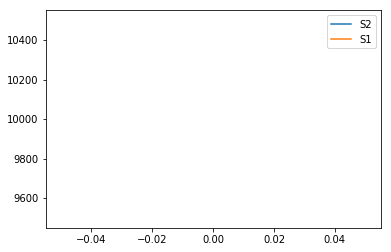

In [9]:
Data_dict = {}
for FullPN, Logger in Logger_dict.items():
    Data_dict[ FullPN ] = np.array( Logger.getData( 0, getCurrentTime(), getCurrentTime() / 100 ) )[ :, :2 ]

FullPNs_for_plot = [ 
    'Variable:/Cell:S1:Value',
    'Variable:/Cell:S2:Value',
    ]

plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

何も表示されない。。。
### 数値データを見てみる
- グラフ描画に用いた数値データを見てみる。

In [10]:
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        print FullPN
        print d
        print ""  # 空行を入れる


Variable:/Cell:S2:Value
[[    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0. 10000.]
 [    0

- データ中の各要素の `[    0. 10000.]` の１番目の要素は時刻、２番目の要素は対象となる `FullPN` の値を表している。
- 100個の全要素の時刻の値が 0 なので、グラフが描けていない。
- これは、E-Cell3 の Logger が **値に変化があった時だけデータを書き込む** 設計になっているため。

# 次のノートブックに進む
- ひとつのノートブックのなかでモデルをリセットできないので、このモデルに `Process` を加えるのは次のノートブックで。